In [48]:
## import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
## Load the dataset
df= pd.read_csv('sp500.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [50]:
## understanding the importance of the features
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [51]:
### Date: The trading date for each record.
### Open: The price at which the stock started trading on that day.
### High: The highest price reached by the stock during the trading day.
### Low: The lowest price reached by the stock during the trading day.
### Close: The price at which the stock ended trading on that day.
### Volume: The total number of shares traded during the day.
### Dividends: The cash dividends paid per share on that date (if any).
### Stock Splits: Indicates if a stock split occurred on that date (e.g., 2 means a 2-for-1 split).

In [52]:
## check the data types of the columns
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [53]:
## Check for missing values in the dataset
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

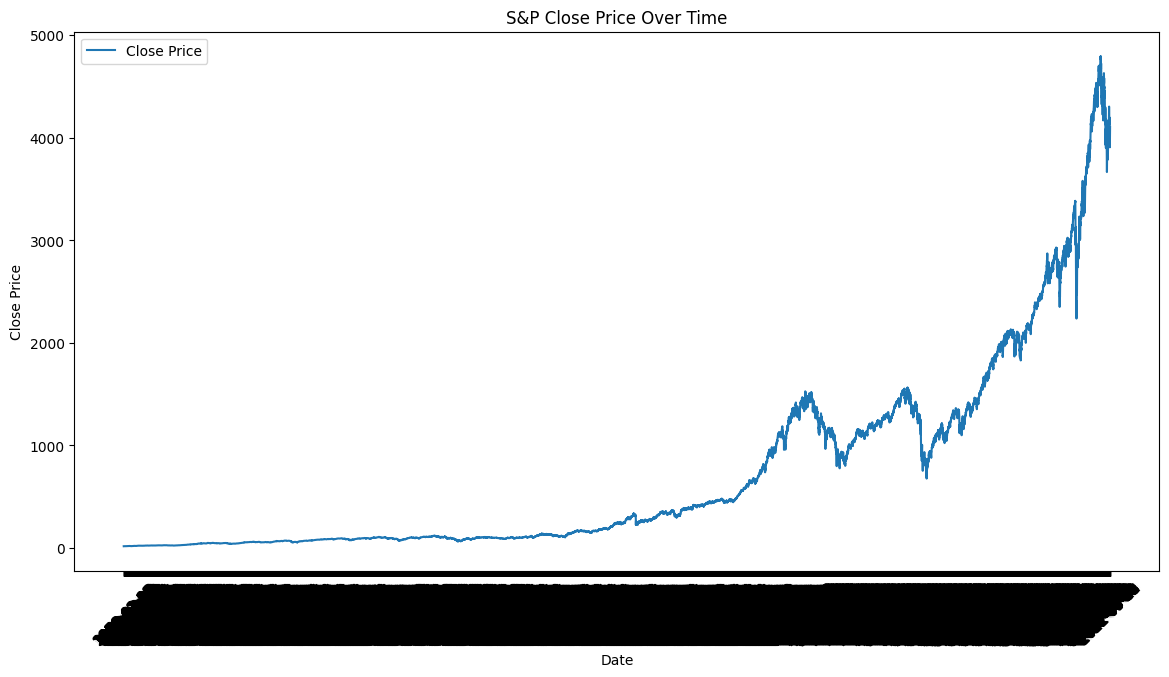

In [54]:
## from the above we can see that there are no missing values in the dataset.
## Now we can visualize the data to understand the trends and patterns.
plt.figure(figsize=(14, 7))
plt.plot(df['Date'],df['Close'],label='Close Price')
plt.title("S&P Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [55]:
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True,axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,2520000


In [56]:
df['Tomorrow'] = df['Close'].shift(-1)
df['Tomorrow']  # This line is to create a new column 'Tomorrow' which contains the next day's closing price.

0          16.850000
1          16.930000
2          16.980000
3          17.080000
4          17.030001
            ...     
18287    3979.870117
18288    4006.179932
18289    4067.360107
18290    4107.279785
18291            NaN
Name: Tomorrow, Length: 18292, dtype: float64

In [57]:
#Check for null Values
df.isnull

<bound method DataFrame.isnull of              Date         Open         High          Low        Close  \
0      1950-01-03    16.660000    16.660000    16.660000    16.660000   
1      1950-01-04    16.850000    16.850000    16.850000    16.850000   
2      1950-01-05    16.930000    16.930000    16.930000    16.930000   
3      1950-01-06    16.980000    16.980000    16.980000    16.980000   
4      1950-01-09    17.080000    17.080000    17.080000    17.080000   
...           ...          ...          ...          ...          ...   
18287  2022-09-06  3930.889893  3942.550049  3886.750000  3908.189941   
18288  2022-09-07  3909.429932  3987.889893  3906.030029  3979.870117   
18289  2022-09-08  3959.939941  4010.500000  3944.810059  4006.179932   
18290  2022-09-09  4022.939941  4076.810059  4022.939941  4067.360107   
18291  2022-09-12  4083.669922  4119.279785  4083.669922  4107.279785   

           Volume     Tomorrow  
0         1260000    16.850000  
1         1890000    16

In [58]:
## Drop the last row since it will have a NaN value for 'Tomorrow'
df.dropna(inplace=True)

In [59]:
##Check the updated Dataset after dropping the last row and check if there are any null values
df.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    0
dtype: int64

In [60]:
## By the above output we can see that there are no null values in the dataset after dropping the last row.
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18291 entries, 0 to 18290
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      18291 non-null  object 
 1   Open      18291 non-null  float64
 2   High      18291 non-null  float64
 3   Low       18291 non-null  float64
 4   Close     18291 non-null  float64
 5   Volume    18291 non-null  int64  
 6   Tomorrow  18291 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [62]:
df['Tomorrow']= df["Tomorrow"].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18291 entries, 0 to 18290
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      18291 non-null  object 
 1   Open      18291 non-null  float64
 2   High      18291 non-null  float64
 3   Low       18291 non-null  float64
 4   Close     18291 non-null  float64
 5   Volume    18291 non-null  int64  
 6   Tomorrow  18291 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.1+ MB


In [64]:
## Create a target variable based on the 'Tomorrow' column
df['Target']= (df['Tomorrow'] > df['Close']).astype(int)
## We are creating a new column 'Target' which will be 1 if the next day's closing price is higher
# than the current day's closing price, otherwise it will be 0.

In [65]:
df.isnull().sum()  # This line checks for any remaining null values in the dataset.

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    0
Target      0
dtype: int64

In [66]:
## So now we perform train and test split
from sklearn.model_selection import train_test_split
X= df.drop(columns=['Date','Tomorrow',"Target"],axis=1)
y= df["Target"]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [67]:
## Now we have our training and testing datasets ready.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14632, 5), (3659, 5), (14632,), (3659,))

In [68]:
## Perfrom Model Training and Evaluation
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
def evaluate_model(true,predict):
    score= accuracy_score(true,predict)
    mae= mean_absolute_error(true,predict)
    mse= mean_squared_error(true,predict)
    rmse= np.sqrt(mean_squared_error(true,predict))
    return score,mae,mse,rmse

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models= {
	"Logistic Regression": LogisticRegression(),
	"Decision Tree": DecisionTreeClassifier(),
	"Random Forest": RandomForestClassifier()
}

for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train,y_train)
    
    ##Predit Training Model
    y_train_predict= model.predict(X_train)
    y_test_predict= model.predict(X_test)
    
    
    ## Testing the accuracy of the model
    train_score,train_mae,train_mse,train_rmse= evaluate_model(y_train,y_train_predict)
    test_score,test_mae,test_mse,test_rmse= evaluate_model(y_test,y_test_predict)
    
    print(list(models.keys())[i])
    
    print("Training model accuracy")
    print(f"accuracy score:",train_score)
    print(f"mean_absolute_error:",train_mae)
    print(f"mean_squared_error:",train_mse)
    print(f"root_mean_squared_error:",train_rmse)
    
    print("---------------------------------------")


    print("testing model accuracy")
    print(f"accuracy score:",test_score)
    print(f"mean_absolute_error:",test_mae)
    print(f"mean_squared_error:",test_mse)
    print(f"root_mean_squared_error:",test_rmse)
    print("="*35)
    print("\n")

Logistic Regression
Training model accuracy
accuracy score: 0.3545653362493166
mean_absolute_error: 0.6454346637506835
mean_squared_error: 0.6454346637506835
root_mean_squared_error: 0.803389484466086
---------------------------------------
testing model accuracy
accuracy score: 0.3495490571194315
mean_absolute_error: 0.6504509428805685
mean_squared_error: 0.6504509428805685
root_mean_squared_error: 0.8065053892445905


Decision Tree
Training model accuracy
accuracy score: 0.9999316566429743
mean_absolute_error: 6.83433570256971e-05
mean_squared_error: 6.83433570256971e-05
root_mean_squared_error: 0.008267004114290563
---------------------------------------
testing model accuracy
accuracy score: 0.6138289150040995
mean_absolute_error: 0.3861710849959005
mean_squared_error: 0.3861710849959005
root_mean_squared_error: 0.6214266529494052


Random Forest
Training model accuracy
accuracy score: 0.9999316566429743
mean_absolute_error: 6.83433570256971e-05
mean_squared_error: 6.83433570256971

In [70]:
## from the above output we can see that the Random Forest Classifier has the 
# highest accuracy score of 0.99 on training dataset and  o.65 testing datasets.
# so will perform hyperparameter tuning on the Random Forest Classifier to improve the accuracy.
from sklearn.model_selection import GridSearchCV
param_grid = {
	'n_estimators': [50, 100, 200],
	'max_depth': [None, 10, 20, 30],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4]
}
rf_model= RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
						   scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)	
best_rf_model = grid_search.best_estimator_
y_train_predict= best_rf_model.predict(X_train)
y_test_predict= best_rf_model.predict(X_test)
train_score,train_mae,train_mse,train_rmse= evaluate_model(y_train,y_train_predict)
test_score,test_mae,test_mse,test_rmse= evaluate_model(y_test,y_test_predict)
print("Training model accuracy after hyperparameter tuning")
print(f"accuracy score:",train_score)	
print(f"mean_absolute_error:",train_mae)
print(f"mean_squared_error:",train_mse)
print(f"root_mean_squared_error:",train_rmse)
print("Testing model accuracy after hyperparameter tuning")
print(f"accuracy score:",test_score)
print(f"mean_absolute_error:",test_mae)
print(f"mean_squared_error:",test_mse)
print(f"root_mean_squared_error:",test_rmse)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score:  0.6550027071591883
Training model accuracy after hyperparameter tuning
accuracy score: 0.7290869327501367
mean_absolute_error: 0.2709130672498633
mean_squared_error: 0.2709130672498633
root_mean_squared_error: 0.5204931000982274
Testing model accuracy after hyperparameter tuning
accuracy score: 0.6624760863623941
mean_absolute_error: 0.3375239136376059
mean_squared_error: 0.3375239136376059
root_mean_squared_error: 0.5809680831488129


In [71]:
## WE will check out the first 10 actual and predicted values side by side
results= pd.DataFrame({
	'Actual':y_test.values,
	'Predicted':y_test_predict   
})
print(results.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          1
3       1          1
4       0          0
5       0          0
6       0          0
7       1          0
8       1          0
9       0          0


In [72]:
## As our accuracy score is 0.72 on the testing dataset, we can say that our model is performing well.

In [73]:
## Pickle the model for future use
import pickle
with open('random_forest_model.pkl','wb') as file:
    pickle.dump(best_rf_model, file)
